# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 13. Data Wrangling (part 3)

### Date: October 4, 2022

### To-Dos From Last Class:

* Download "imitation inhibition" task data from <a href="https://github.com/hogeveen-lab/DSPN_Fall2022_Git/tree/master/misc_exercises/imitation_inhibition_paradigm">Github</a>
* Download <a href="https://github.com/hogeveen-lab/DSPN_Fall2022_Git/tree/master/assignment_starters/assign3_starter">Assignment #3 starter kit</a>

### Today:

* Wrangle some real data

### Homework
* Submit Assignment #3: <a href="https://www.dropbox.com/request/5tyrxS7O80R8XD2qLbx5">Data Wrangling</a> (before 10/13, 23:00 MDT)
* Open R Studio from anaconda (optional: <a href="https://richpauloo.github.io/2018-05-16-Installing-the-R-kernel-in-Jupyter-Lab/">set up an R Kernel to stay in Jupyter</a>; warning: can come with some package installation headaches!)

# Importing packages

In [1]:
### Part 1 --> Importing data wrangling packages I often use
import os
from glob import glob # only need the glob subpackage from glob
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
#add...
import matplotlib.pyplot as plt

# Setting up the filepaths

In [4]:
# get current working directory
base_dir = os.getcwd()
# base_dir = os.path.dirname(os.getcwd()) # note: This goes up above script's directory one step in the filepath, often useful!

# Go above current working directory and
first_dir = os.path.join(base_dir,'misc_exercises/imitation_inhibition_paradigm/data/first') #misc_exercises/ for git
P_file_pattern = 'P*.txt'
second_dir = os.path.join(base_dir,'misc_exercises/imitation_inhibition_paradigm/data/second')
questionnaire_file = os.path.join(second_dir,'ait_questionnaires.csv')

# Using glob to find all participant data files
all_files = glob(os.path.join(first_dir,P_file_pattern))
# print(all_files)

# Loading in a test subject to make sense of things

In [5]:
# Reading in the data
sample_df = pd.read_csv(all_files[0], skiprows=5, sep='\t')
print('How many rows in initial loaded data frame:',len(sample_df)) # What things might cause this to not == 100?


# Filtering the data down to just the experimental block rows
sample_df = sample_df[sample_df['Name.1']=="AI_Block"]

# Filtering the dataframe down to RELEASES
sample_df_releases = sample_df[sample_df['Released']=='Released']

# How many key release responses do we have?
print('How many rows in key release filtered data frame:',len(sample_df_releases))

# Identifying double responses
sample_df_releases['shift'] = sample_df_releases['Name.2'].shift(1)
# display(sample_df_releases[['Name.2','shift']])

# filter down to only the first response
sample_df_releases['double_response'] = np.where(sample_df_releases['shift']==sample_df_releases['Name.2'],1,0)
double_resp_df = sample_df_releases[sample_df_releases['double_response']==1]
# display(double_resp_df[['Name.2','shift','double_response']])

# Filtering our double response trials
sample_df_releases_nodouble = sample_df_releases[sample_df_releases['double_response']==0] 
print('How many rows in no-double-response filtered data frame:',len(sample_df_releases_nodouble))

How many rows in initial loaded data frame: 521
How many rows in key release filtered data frame: 101
How many rows in no-double-response filtered data frame: 100


# Iterating through to get all first level data, concatenating into a single data frame

In [15]:
# create a blank list, which I will fill with inidividual participant data frames
dfs_list = []

# iterating through the subjects
pid_counter = 0
for cur_file in all_files:
    # update counter
    pid_counter += 1
    # pull all the wrangling lines from our sample run, to run in a loop
    tmp_df = pd.read_csv(cur_file, skiprows = 5, sep='\t')
    tmp_df = tmp_df[(tmp_df['Released'] == 'Released') & (tmp_df['Name.1']=='AI_Block')]
    tmp_df['double_response'] = np.where(tmp_df['Name.2']==tmp_df['Name.2'].shift(),1,0)
    tmp_df = tmp_df[tmp_df['double_response']==0]
    #Appending logic to put together datqa frames in a list
    dfs_list.append(tmp_df)

# print(dfs_list)
allsubs_df = pd.concat(dfs_list,axis=0)

# Checking what we got and making sure it makes sense given our trial count
print('the participant from our loop;',pid_counter,'should be roughly equal to our # of rows / 100:',
      allsubs_df['Congruence'].count() / 100)

the participant from our loop; 48 should be roughly equal to our # of rows / 100: 47.45


# Loading in the questionnaire data and merging it with behavioral data

In [25]:
# reading in the questionnaire
quest_df = pd.read_csv(questionnaire_file)

# renaming column to pid
allsubs_df = allsubs_df.rename(columns={"Name": "pid"})

# Merging questionairres and main df
allsubs_df = pd.merge(allsubs_df,quest_df,on='pid',how='outer')
display(allsubs_df)


,Group,pid,Name.1,Name.2,Name.3,Response,Key,Released,Response.1,Code,...,questionnaire_1_y,questionnaire_2_y,questionnaire_3_y,questionnaire_4_y,questionnaire_5_y,questionnaire_6_y,questionnaire_7_y,questionnaire_8_y,questionnaire_9_y,questionnaire_10_y
0,Main Group,P8,AI_Block,"AI_Trial, 7","AI_Blue (7, i5inc.bmp)",index,v,Released,(based on code value),C,...,62,22,74,37,62,32,46,56,43,78
1,Main Group,P8,AI_Block,"AI_Trial, 10","AI_Blue (10, m5base.bmp)",middle,b,Released,(based on code value),C,...,62,22,74,37,62,32,46,56,43,78
2,Main Group,P8,AI_Block,"AI_Trial, 5","AI_Final_Stage (5, i4con.bmp)",index,v,Released,(based on code value),C,...,62,22,74,37,62,32,46,56,43,78
3,Main Group,P8,AI_Block,"AI_Trial, 9","AI_Blue (9, i5base.bmp)",index,v,Released,(based on code value),C,...,62,22,74,37,62,32,46,56,43,78
4,Main Group,P8,AI_Block,"AI_Trial, 3","AI_Final_Stage (3, i4baseinc.bmp)",index,v,Released,(based on code value),C,...,62,22,74,37,62,32,46,56,43,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,Main Group,P41,AI_Block,"AI_Trial, 4","AI_Final_Stage (4, m4baseinc.bmp)",index,v,Released,(based on code value),E,...,74,78,11,82,74,54,8,36,73,22
4741,Main Group,P41,AI_Block,"AI_Trial, 8","AI_Final_Stage (8, m4inc.bmp)",middle,b,Released,(based on code value),C,...,74,78,11,82,74,54,8,36,73,22
4742,Main Group,P41,AI_Block,"AI_Trial, 5","AI_Final_Stage (5, i4con.bmp)",index,v,Released,(based on code value),C,...,74,78,11,82,74,54,8,36,73,22
4743,Main Group,P41,AI_Block,"AI_Trial, 6","AI_Final_Stage (6, m4con.bmp)",middle,b,Released,(based on code value),C,...,74,78,11,82,74,54,8,36,73,22


# Writing the observation-level data to a big csv

In [ ]:
out_filename = os.path.join(second_dir,"ait_trialwise.csv")
allsubs_df.to_csv(out_filename,index=False)

## Quick tangent: Automatic Imitation Task

<img src="img/ait_task.png">

* __MAIN OUTCOME: HOW DO THE DIFFERENT CONGRUENT VS. INCONGRUENT CONDIS SLOW YOUR RESPONSE TIME?__

# Computing SECOND-level summary measures (mean RT by pid)

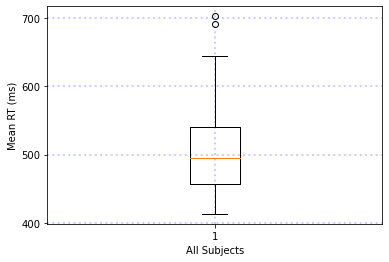

In [27]:
mean_rt = allsubs_df.groupby('pid')['Time'].mean()
plt.boxplot(mean_rt)
plt.xlabel('All Subjects')
plt.ylabel('Mean RT (ms)')
plt.grid(b=True,color='blue',alpha=0.2,linestyle=':',linewidth=2)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [5,8]
plt.show()

# Computing SECOND-level summary measures (mean RT by pid by condition)

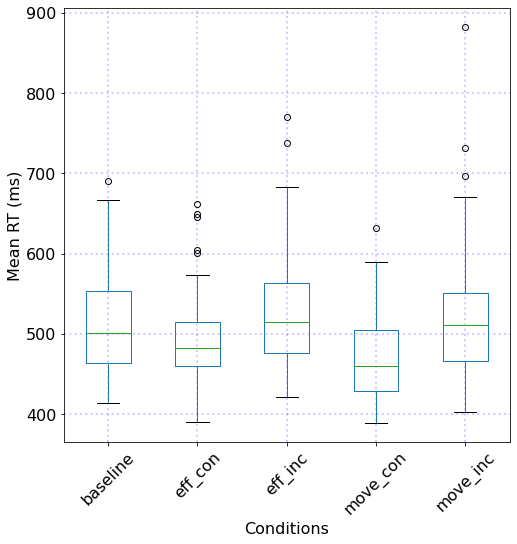

In [35]:
# note, this is an embedded np.where statement to recode the congruence integers as something more meaningful
# Feel free to just groupby Congruence instead!
allsubs_df['strCondition'] = np.where(allsubs_df['Congruence']==0, 'baseline',
                                      np.where(allsubs_df['Congruence']==1, 'eff_con',
                                               np.where(allsubs_df['Congruence']==2, 'eff_inc',
                                                        np.where(allsubs_df['Congruence']==3, 'move_con',
                                                                 np.where(allsubs_df['Congruence']==4, 'move_inc','NA')))))

mean_cdn_rt = allsubs_df.groupby(['pid','strCondition'])['Time'].mean().unstack()
# display(mean_cdn_rt)
plot = mean_cdn_rt.boxplot()
plt.xticks(rotation = 45)
plt.xlabel('Conditions')
plt.ylabel('Mean RT (ms)')
plt.grid(b=True,color='blue',alpha=0.2,linestyle=':',linewidth=2)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [8,8]
plt.show()

# Writing the subject-level RT data to a CSV

In [34]:
# Writing the data to a second-level data frame that we will eventually play with in R
subj_out_filename = os.path.join(second_dir,'ait_subjectlevel.csv')
mean_cdn_rt.to_csv(subj_out_filename,index=True)